<a href="https://colab.research.google.com/github/OscarAlvaradoM/Introduccion-al-Aprendizaje-Profundo/blob/main/tarea1/Tarea1_P1y2_IAP_OscarAlvarado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1: Preceptrón y Redes Densas

Óscar Anuar Alvarado Morán

## 1.- 
Un  perceptrón o neurona no es capaz de aproximar una función que separe en dos clases (naranja y azul) el conjunto de datos mostrado en la Figura 1. Propón una transformaciónn aplicada a los atributos $x_1$ y $x_2$ de forma que puedan ser separados por solo un perceptrónn. Justifica porque la transformación propuesta funciona.

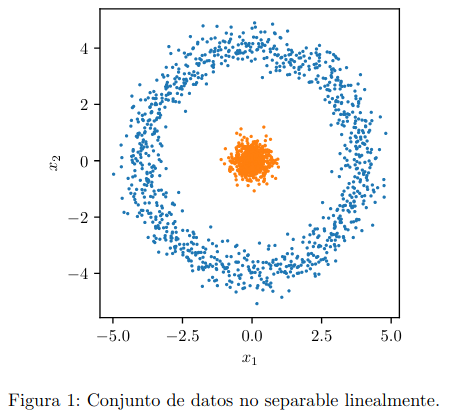

Creo que la mejor opción sería la suma de los cuadrados de las coordenadas, ya que esto nos mapeará radialmente los puntos, es decir, mientras más cercanos estén al cero, más pequeño será el valor del mapeo, y mientras más lejos estén los enviará más lejos, entonces se presta muy bien ya que sí hay un umbral significativo entre ambas categorías. 

## 2.- 
Extiende el ejercicio `1c_reglin.ipynb` visto en clase para realizar regresión lineal con los dos atributos de entrada.

In [ ]:
# sistema de archivos
import os

# gráficas
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# csv
import pandas as pd
# redes neuronales
import torch

In [ ]:
URL = 'https://raw.githubusercontent.com/bereml/iap/master/datos/califs.csv'
base_dir = '../datos'
filename = 'califs.csv'
filepath = os.path.join(base_dir, filename)

In [ ]:
! mkdir {base_dir}
! wget -nc {URL} -O {filepath}

--2021-03-18 09:33:22--  https://raw.githubusercontent.com/bereml/iap/master/datos/califs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666 [text/plain]
Saving to: ‘../datos/califs.csv’

../datos/califs.csv 100%[===================>]     666  --.-KB/s    in 0s      

2021-03-18 09:33:22 (40.6 MB/s) - ‘../datos/califs.csv’ saved [666/666]



In [ ]:
df = pd.read_csv(filepath)
df.head(5)

,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7


In [ ]:
x = torch.tensor(df.iloc[:, :2].values)
x = x.view(-1,2).type(torch.float32)
print(x.shape)
x[:5]

torch.Size([50, 2])


tensor([[ 5.6000,  8.2000],
        [ 6.7000,  9.3000],
        [ 5.1000, 10.0000],
        [ 5.7000, 10.4000],
        [ 7.1000, 10.4000]])

In [ ]:
x1 = torch.tensor(df.iloc[:, 0].values)
x1 = x1.view(-1,1).type(torch.float32)
print(x1.shape)
x1[:5]

torch.Size([50, 1])


tensor([[5.6000],
        [6.7000],
        [5.1000],
        [5.7000],
        [7.1000]])

In [ ]:
x2 = torch.tensor(df.iloc[:, 1].values)
x2 = x2.view(-1,1).type(torch.float32)
print(x2.shape)
x2[:5]

torch.Size([50, 1])


tensor([[ 8.2000],
        [ 9.3000],
        [10.0000],
        [10.4000],
        [10.4000]])

In [ ]:
y_true = torch.tensor(df.iloc[:, 2].values)
y_true = y_true.view(-1,1).type(torch.float32)
print(y_true.shape)
y_true[:5]

torch.Size([50, 1])


tensor([[5.1000],
        [5.9000],
        [5.4000],
        [6.5000],
        [6.7000]])

In [ ]:
# número de ejemplos y atributos
m, d = x.shape
m, d

(50, 2)

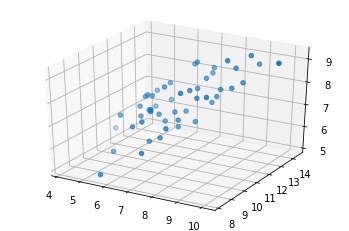

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1.view(-1).numpy(),x2.view(-1).numpy(),y_true.view(-1).numpy())

In [ ]:
def train(x, y_true, alpha=0.01, steps=10):
    """Fits linear regression."""

    # ejemplos, atributos
    m, d = x.shape

    # inicialización de parámetros
    w = torch.zeros(d, 1)
    b = torch.zeros(1)
    # histórico de pérdidas
    loss_hist = []

    # ciclo de entrenamiento
    for i in range(steps):

        # cómputo de la hipótesis
        y_pred = x @ w + b
        
        # cómputo de la pérdida
        loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)

        # cómputo del gradiente
        grad_w = (x.T @ (y_pred - y_true)) / m
        grad_b = (y_pred - y_true).sum() / m

        # actualización de parámetros
        w = w - alpha * grad_w
        b = b - alpha * grad_b

        # histórico de pérdida
        loss_hist.append(loss)

    return w, b, loss_hist

In [ ]:
w, b, loss_hist = train(x, y_true, alpha=0.1)
w, b

(tensor([[-1.0870e+12],
         [-1.9267e+12]]), tensor([-1.5874e+11]))

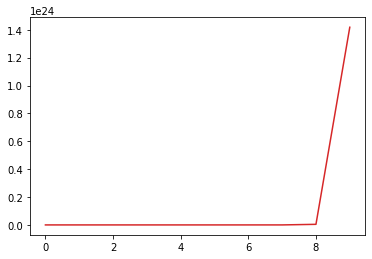

In [ ]:
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.show()

In [ ]:
w, b, loss_hist = train(x, y_true, alpha=0.01)
w, b

(tensor([[0.1325],
         [0.2392]]), tensor([0.0194]))

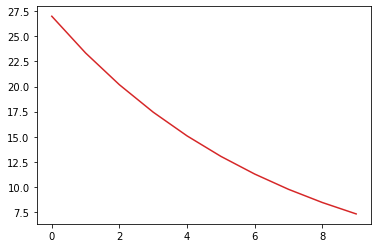

In [ ]:
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.show()

In [ ]:
w, b, loss_hist = train(x, y_true, alpha=0.001)
w, b

(tensor([[0.2283],
         [0.4052]]), tensor([0.0334]))

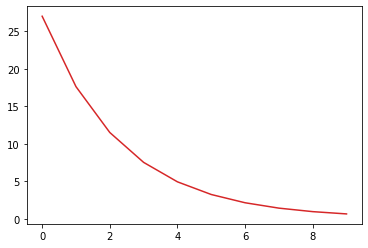

In [ ]:
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.show()

In [ ]:
w, b, loss_hist = train(x, y_true, alpha=0.0001)
w, b

(tensor([[0.0458],
         [0.0812]]), tensor([0.0067]))

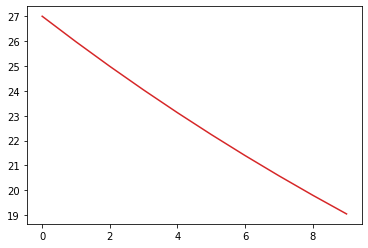

In [ ]:
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.show()

In [ ]:
w, b, loss_hist = train(x, y_true, alpha=0.001, steps = 20)
w, b

(tensor([[0.2549],
         [0.4528]]), tensor([0.0372]))

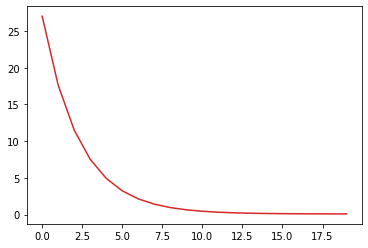

In [ ]:
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.show()

Vemos que influye mucho la tasa de aprendizaje, ya que con un cambio de décimas se puede volver mucho peor un modelo con el mismo número de pasos. Vemos que no afecta mucho al dar más pasos cuando ya se está configurando bien la tasa de aprendizaje.